<a href="https://colab.research.google.com/github/jsmazorra/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/Johan_Mazorra_LS_DS13_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [16]:
df = df.drop('diagnosis', axis=1)
df = df.drop('Unnamed: 32', axis=1)
df = df.drop('id', axis=1)
print(df.shape)
df.head()

(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


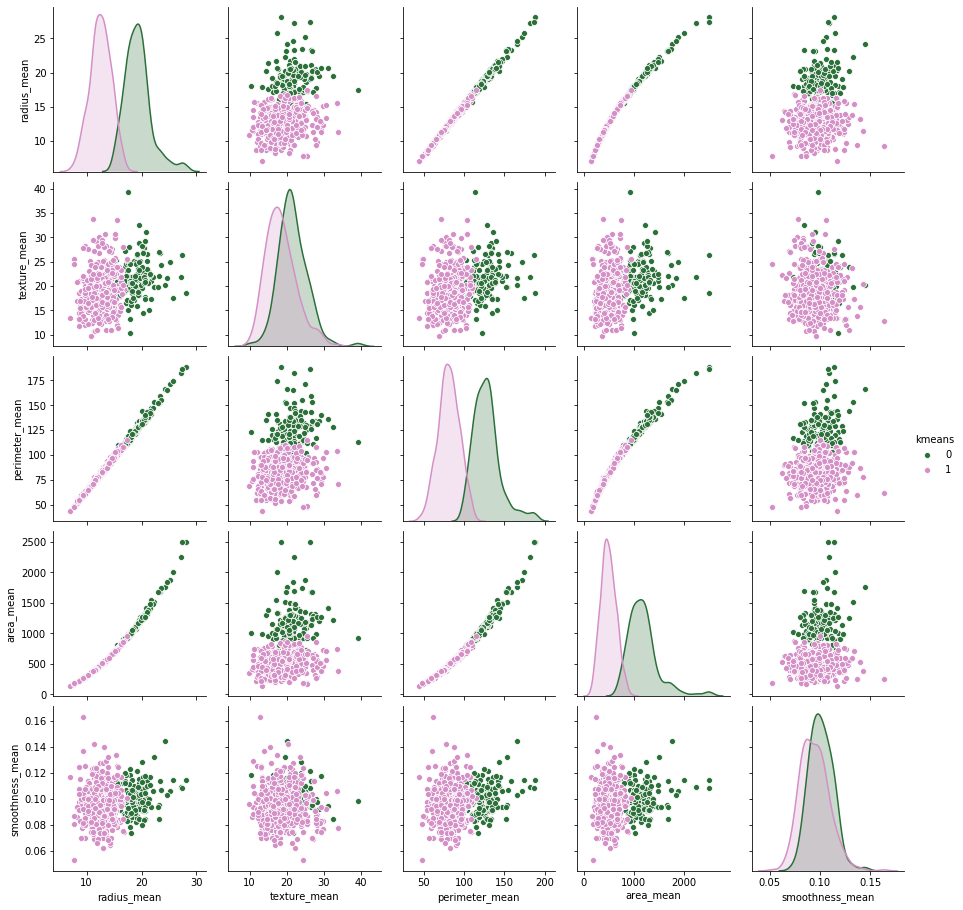

In [38]:
# We're going to start by doing a graph on the K-means clusters by using seaborn.

import seaborn as sns

kmeans = KMeans(2)
kmeans.fit(df)
df['kmeans'] = pd.Series(kmeans.labels_)

sns.pairplot(df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','kmeans']],
             hue='kmeans', palette='cubehelix');

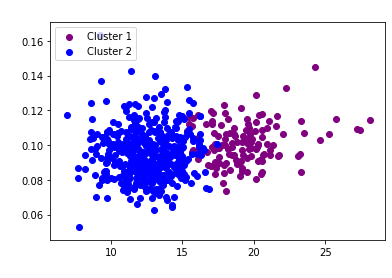

In [76]:
#  There seem to be some obvious splits on the graphs of the raw data by KMeans.

fig, ax = plt.subplots()

df1 = df[df['kmeans']==0]
df2 = df[df['kmeans']==1]

ax.scatter(df1['radius_mean'], df1['smoothness_mean'], color='purple', label='Cluster 1')
ax.scatter(df2['radius_mean'], df2['smoothness_mean'], color='blue', label='Cluster 2')

ax.legend(loc='upper left')

ax.set_xlabel('Radius Mean', color='white')
ax.set_ylabel('Smoothness Mean', color='white')
ax.set_title('Radius Mean vs. Smoothness Mean', color='white')

plt.show()

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [43]:
# We're going to load again the dataset to get the diagnosis.
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")

df = df.drop('Unnamed: 32', axis=1)
df = df.drop('id', axis=1)

df['kmeans'] = pd.Series(kmeans.labels_)

# First we're goign to numerize it.
df['diagnosis'].value_counts(dropna=False)

B    357
M    212
Name: diagnosis, dtype: int64

In [44]:
# No NaNs here.
df['diagnosis'] = df['diagnosis'].map({'B':0,'M':1})

df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [45]:
# We're going to use this later.
diag = df['diagnosis'].copy()

raw_accuracy = (df['diagnosis'] == df['kmeans']).value_counts()[1] / df.shape[0]

print('Cluster Accuracy: ',raw_accuracy)

Cluster Accuracy:  0.14586994727592267


# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



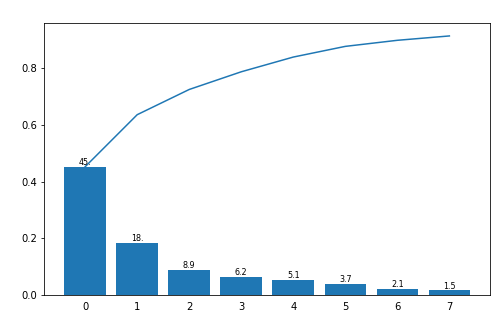

In [51]:
# We're going to start by doing the elbow method.

# Then we're going to standardize the data.
scaler = StandardScaler()
Z = scaler.fit_transform(df)

# The only components that matter for 90% of the result for the PCA.
pca = PCA(.9)
f_pca = pca.fit_transform(Z)

# Then we're going to set up the x values.
num_compos = len(pca.explained_variance_ratio_)
ind = np.arange(num_compos)
vals = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
cum_vals = np.cumsum(vals)
ax.bar(ind, vals)
ax.plot(ind, cum_vals)

for i in range(num_compos):
  ax.annotate(r'%s' % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va='bottom', ha='center', fontsize=8)

ax.xaxis.set_tick_params(width=0)

ax.set_xlabel('Principal Component', color='white')
ax.set_ylabel('Variance Explained', color='white')
plt.title('Explained Variance Per Principal Component', color='white')
plt.show()

In [53]:
# We're going to turn f_pca into a DataFrame to see what it looks like.
f_pca = pd.DataFrame(f_pca)

f_pca.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']

f_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,9.358928,2.290827,-0.932019,-3.707943,-1.244678,1.419775,2.183242,-0.184197
1,3.050810,-3.882385,-0.501460,-1.130559,0.528175,0.016317,-0.172888,0.834906
2,6.159316,-0.963129,-0.483559,-0.949292,-0.202120,0.540155,-0.681618,0.120144
3,6.656588,10.652299,-3.296264,-0.118501,-2.959960,3.063642,1.369031,1.249136
4,4.457296,-1.961136,1.464617,-2.884858,0.358357,-1.245523,-1.121281,0.904063


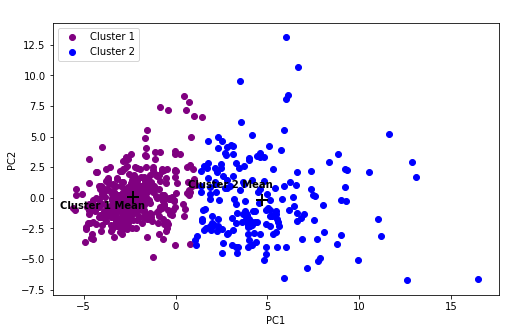

In [100]:
# We're going to start with two clusters, since there's only one main principal component.
kmeans = KMeans(2)
kmeans.fit(f_pca)

f_pca['pca_labels'] = pd.Series(kmeans.labels_)

pca_f_0 = f_pca[f_pca['pca_labels']==0]
pca_f_1 = f_pca[f_pca['pca_labels']==1]

# Now I'm going to graph for both PCAs.
plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
ax.scatter(pca_f_0['PC1'], pca_f_0['PC2'], color='purple', label='Cluster 1')
ax.scatter(pca_f_1['PC1'], pca_f_1['PC2'], color='blue', label='Cluster 2')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Standardized Data: PC1 vs. PC2', color='white')

ax.legend(loc='upper left')

mean_0_PC1 = np.mean(pca_f_0['PC1'])
mean_0_PC2 = np.mean(pca_f_0['PC2'])
mean_1_PC1 = np.mean(pca_f_1['PC1'])
mean_1_PC2 = np.mean(pca_f_1['PC2'])

# I'm going to put the centroids on the plot.
ax.plot(mean_0_PC1, mean_0_PC2, marker='+', color='black', markersize=12, markeredgewidth=2)
ax.plot(mean_1_PC1, mean_1_PC2, marker='+', color='black', markersize=12, markeredgewidth=2)
ax.annotate('Cluster 1 Mean', xy=(mean_0_PC1-4, mean_0_PC2-1), fontweight='bold')
ax.annotate('Cluster 2 Mean', xy=(mean_1_PC1-4, mean_1_PC2+1), fontweight='bold')

plt.show()

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

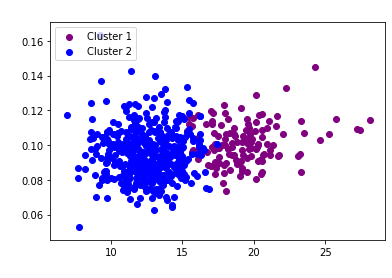

In [93]:
# I'm going to re-add the code of the graphs to showcase the comparison
# between the two.

fig, ax = plt.subplots()

df1 = df[df['kmeans']==0]
df2 = df[df['kmeans']==1]

ax.scatter(df1['radius_mean'], df1['smoothness_mean'], color='purple', label='Cluster 1')
ax.scatter(df2['radius_mean'], df2['smoothness_mean'], color='blue', label='Cluster 2')

ax.legend(loc='upper left')

ax.set_xlabel('Radius Mean', color='white')
ax.set_ylabel('Smoothness Mean', color='white')
ax.set_title('Radius Mean vs. Smoothness Mean', color='white')

plt.show()

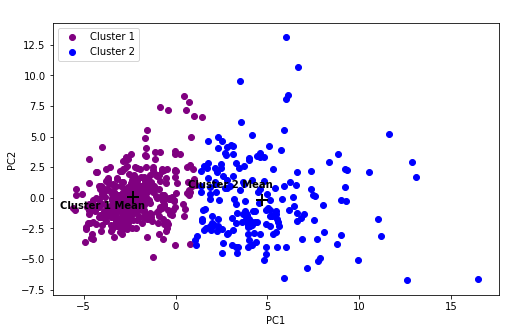

In [97]:
kmeans = KMeans(2)
kmeans.fit(f_pca)

f_pca['pca_labels'] = pd.Series(kmeans.labels_)

pca_f_0 = f_pca[f_pca['pca_labels']==0]
pca_f_1 = f_pca[f_pca['pca_labels']==1]

plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
ax.scatter(pca_f_0['PC1'], pca_f_0['PC2'], color='purple', label='Cluster 1')
ax.scatter(pca_f_1['PC1'], pca_f_1['PC2'], color='blue', label='Cluster 2')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Standardized Data: PC1 vs. PC2', color='white')

ax.legend(loc='upper left')

mean_0_PC1 = np.mean(pca_f_0['PC1'])
mean_0_PC2 = np.mean(pca_f_0['PC2'])
mean_1_PC1 = np.mean(pca_f_1['PC1'])
mean_1_PC2 = np.mean(pca_f_1['PC2'])

ax.plot(mean_0_PC1, mean_0_PC2, marker='+', color='black', markersize=12, markeredgewidth=2)
ax.plot(mean_1_PC1, mean_1_PC2, marker='+', color='black', markersize=12, markeredgewidth=2)
ax.annotate('Cluster 1 Mean', xy=(mean_0_PC1-4, mean_0_PC2-1), fontweight='bold')
ax.annotate('Cluster 2 Mean', xy=(mean_1_PC1-4, mean_1_PC2+1), fontweight='bold')

plt.show()

In [98]:
# Finally we're going to compare the accuracy scores for pre- and post-PCA.

f_pca['diagnosis'] = diag

print('Raw Accuracy: ',raw_accuracy)
print('Accuracy After PCA: ', (f_pca['diagnosis'] == f_pca['pca_labels']).value_counts()[1] / f_pca.shape[0])

Raw Accuracy:  0.14586994727592267
Accuracy After PCA:  0.9349736379613357


# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project